In [1]:
import numpy as np
import matplotlib.pyplot as plt
from healpy.newvisufunc import projview, newprojplot
import sys
import healpy as hp
import tqdm


sys.path.append('../pipeline_scripts/')
from pipeline_main import serialize_dictionary, pipeline
from pipeline_streamers import accretion_pattern
from plotting_setup import *


In [2]:
data = pipeline(snap = 362, run = 'sink13fmr05', sink_id=13)
data.recalc_L(), data.L

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4165/4165 [00:06<00:00, 641.87it/s]


Converged mean angular momentum vector after 1 iteration(s)


(None, array([ 0.93066521, -0.36572933, -0.0102134 ]))

In [3]:
np.cross(np.array([0,1,0]), np.array([0,0,1]))

array([1, 0, 0])

In [4]:
data.calc_trans_xyz()

Transforming old z-coordinate into mean angular momentum vector


100%|██████████| 4165/4165 [00:00<00:00, 4310.43it/s]


In [5]:
map, nside, _ = data.accretion_pattern(verbose=1, shell_r = 50)

  0%|          | 0/961 [00:00<?, ?it/s]

100%|██████████| 961/961 [00:06<00:00, 144.96it/s]


Number of pixels on the sphere:  21168
Pixels without any representation:  419
Percentage of no-coverage: 1.98 %
Interpolating unpopulated cells...


<Figure size 1200x800 with 0 Axes>

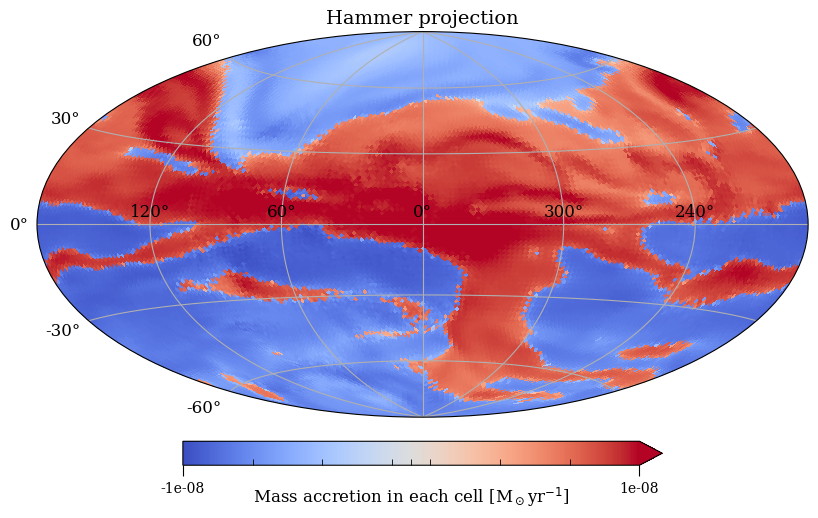

In [6]:
fig = plt.figure(figsize = (12,8)) 
ax = projview(
    map,
    norm = 'symlog',
    max = 1e-8,
    min = -1e-8,
    norm_dict = {'linthresh': 1e-14, 'linscale': 0.5},
    coord=["G"],
    cmap = 'coolwarm',
    graticule=True,
    flip = 'astro',
    graticule_labels=True,
    cb_orientation="horizontal",
    rot = (0, 0),
    #latitude_grid_spacing=30,
    projection_type="hammer",
    title="Hammer projection",
    unit = r'Mass accretion in each cell [M$_\odot$yr$^{-1}$]'
);
